# Importing Data

In [2]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path = r'C:\Users\Oa\Career Foundry'

In [4]:
df_ords_prods_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Sampled_order_product_all.pkl'))

# Exploring Data

In [5]:
df_ords_prods_merge.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'price_range_loc', 'busiest_days', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'mean_order', 'type_of_spender', 'frequency_median',
       'type_of_frequency', 'Age', 'n_dependants', 'fam_status', 'income',
       '_merge'],
      dtype='object')

<Axes: xlabel='loyalty_flag'>

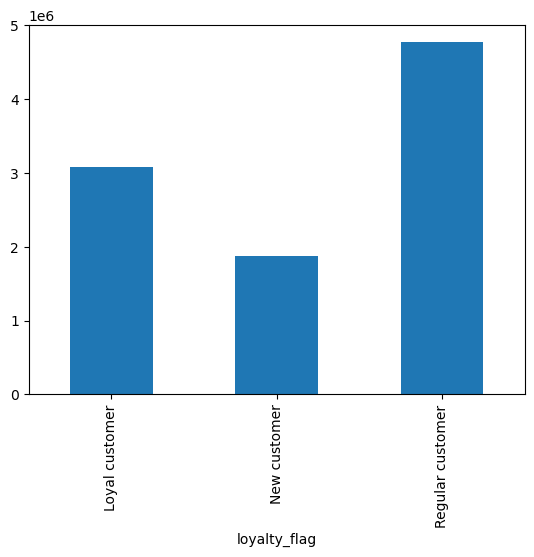

In [6]:
df_ords_prods_merge['loyalty_flag'].value_counts().sort_index().plot.bar()

In [7]:
df_ords_prods_merge['loyalty_flag'].value_counts().sort_index()

loyalty_flag
Loyal customer      3085987
New customer        1873935
Regular customer    4769807
Name: count, dtype: int64

In [8]:
# average days_since_prior_order by loyalty_flag 
avg_days_since_prior_order = df_ords_prods_merge.groupby('loyalty_flag')['days_since_prior_order'].mean().reset_index()

In [15]:
# Display results
avg_days_since_prior_order

,loyalty_flag,days_since_prior_order
0,Loyal customer,6.027841
1,New customer,17.970722
2,Regular customer,12.148818


In [11]:
# Grouping by 'loyalty_flag' and calculating the mean price
avg_price = df_ords_prods_merge.groupby('loyalty_flag')['prices'].mean().reset_index()

In [13]:
# Renaming columns for clarity
avg_price.rename(columns={'prices': 'average_price'}, inplace=True)

In [14]:
# Display results
avg_price.head(10)

,loyalty_flag,average_price
0,Loyal customer,10.413674
1,New customer,13.200319
2,Regular customer,12.359119


In [10]:
# Grouping by 'loyalty_flag' and calculating the number one product_id
cnt_product = df_ords_prods_merge.groupby('loyalty_flag')['income'].value_counts().idxmax()

In [11]:
cnt_product

('Loyal customer', 72344)

In [12]:
df_ords_prods_merge.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,mean_order,type_of_spender,frequency_median,type_of_frequency,Age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
3,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
4,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
5,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
6,473747,1,3,3,12,21.0,10258,3,1,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
7,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
8,431534,1,5,4,15,28.0,196,1,1,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
9,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both


## finding most popular items bassed on loyality flag

In [ ]:
# Grouping by loyalty_flag and product_name, then counting occurrences
popular_products = df_ords_prods_merge.groupby(['loyalty_flag', 'product_name']).size().reset_index(name='count')

In [ ]:
# Finding the most popular product in each loyalty flag group
most_popular = popular_products.loc[popular_products.groupby('loyalty_flag')['count'].idxmax()]

In [ ]:
# Finding the most popular product in each loyalty flag group
most_popular = popular_products.loc[popular_products.groupby('loyalty_flag')['count'].idxmax()]

In [ ]:
most_popular[['loyalty_flag', 'product_name', 'count']]

,loyalty_flag,product_name,count
2784,Loyal customer,Banana,46765
41377,New customer,Banana,25414
83461,Regular customer,Banana,69781


## explore data more

In [17]:
df_ords_prods_merge.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,mean_order,type_of_spender,frequency_median,type_of_frequency,Age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
3,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
4,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
5,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
6,473747,1,3,3,12,21.0,10258,3,1,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
7,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
8,431534,1,5,4,15,28.0,196,1,1,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
9,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both


In [18]:
df_count_product_name = df_ords_prods_merge['product_name'].value_counts(dropna= False)

In [19]:
df_count_product_name.head(10)

product_name
Banana                    141960
Bag of Organic Bananas    114106
Organic Strawberries       78978
Organic Baby Spinach       71921
Organic Hass Avocado       63885
Organic Avocado            52908
Large Lemon                45982
Strawberries               42968
Limes                      41967
Organic Whole Milk         41527
Name: count, dtype: int64

In [20]:
max_price_df = df_ords_prods_merge.groupby('loyalty_flag')['prices'].max().reset_index()

## filter out bad data

In [21]:
max_price_df.value_counts

<bound method DataFrame.value_counts of        loyalty_flag   prices
0    Loyal customer  99999.0
1      New customer  99999.0
2  Regular customer  99999.0>

In [22]:
filtered_df = df_ords_prods_merge[df_ords_prods_merge['prices'] <= 100]

In [23]:
max_price_df = filtered_df.groupby('product_name')['loyalty_flag'].idxmax().reset_index()

# break down into loyalty_flags statues

In [ ]:
regular_customer_df = filtered_df[filtered_df['loyalty_flag'] == 'Regular customer']

In [ ]:
New_customer_df = filtered_df[filtered_df['loyalty_flag'] == 'New customer']

In [ ]:
Loyal_customer_df = filtered_df[filtered_df['loyalty_flag'] == 'Loyal customer']

# Exploring new data

In [27]:
regular_customer_df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,mean_order,type_of_spender,frequency_median,type_of_frequency,Age,n_dependants,fam_status,income,_merge
17,2168274,2,1,2,11,NaN,47766,2,0,Organic Avocado,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
18,2168274,2,1,2,11,NaN,22474,6,0,Cheddar Bunnies Snack Crackers,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
19,2168274,2,1,2,11,NaN,16589,7,0,Plantain Chips,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
20,2168274,2,1,2,11,NaN,13176,12,0,Bag of Organic Bananas,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
21,2168274,2,1,2,11,NaN,45066,13,0,Honeycrisp Apple,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
22,1901567,2,3,1,10,3.0,32792,2,1,Chipotle Beef & Pork Realstick,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
23,738281,2,4,2,10,8.0,32139,3,0,Hommus Classic Original,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
24,738281,2,4,2,10,8.0,36735,5,0,Organic Roasted Sliced Chicken Breast,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
25,738281,2,4,2,10,8.0,22829,7,0,Multigrain Flax Seeded Flatbread Crackers,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both
26,738281,2,4,2,10,8.0,45613,11,0,Pad Thai,...,Regular customer,8.035897,Low spender,8.0,Frequent customer,68,3,married,64940,both


In [28]:
New_customer_df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,loyalty_flag,mean_order,type_of_spender,frequency_median,type_of_frequency,Age,n_dependants,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
1,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
2,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
3,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
4,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
5,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
6,473747,1,3,3,12,21.0,10258,3,1,Pistachios,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
7,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
8,431534,1,5,4,15,28.0,196,1,1,Soda,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both
9,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,New customer,5.813559,Low spender,6.0,Frequent customer,31,3,married,40423,both


In [29]:
New_customer_df['product_name'].head(10)

0                          Soda
1           Original Beef Jerky
2    Aged White Cheddar Popcorn
3                    Pistachios
4         Cinnamon Toast Crunch
5           Original Beef Jerky
6                    Pistachios
7         Organic String Cheese
8                          Soda
9           Original Beef Jerky
Name: product_name, dtype: object

# historgraph findings

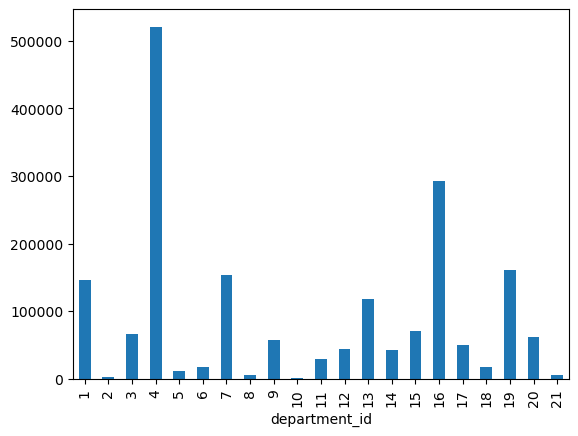

In [30]:
nc_depart_hist= New_customer_df['department_id'].value_counts().sort_index().plot.bar()

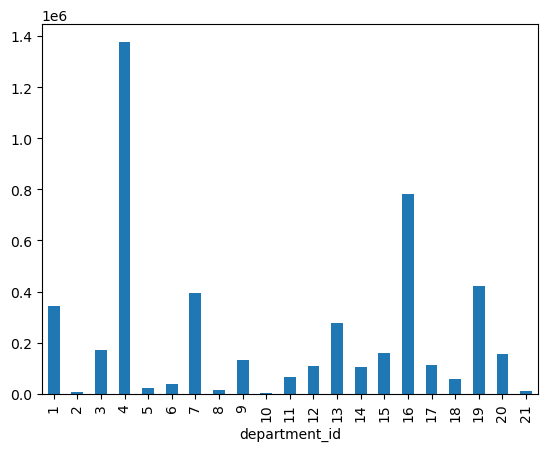

In [31]:
rg_depart_hist= regular_customer_df['department_id'].value_counts().sort_index().plot.bar()

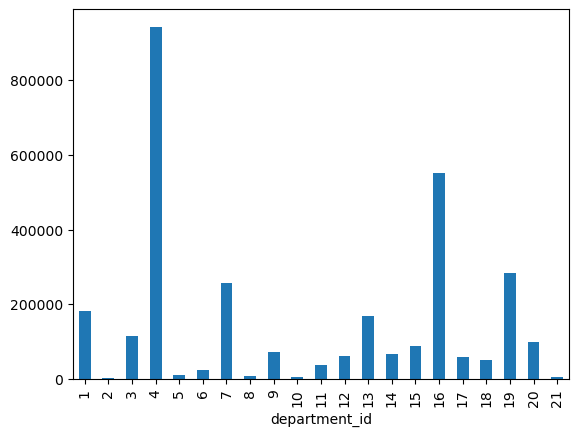

In [32]:
ly_depart_hist= Loyal_customer_df['department_id'].value_counts().sort_index().plot.bar()

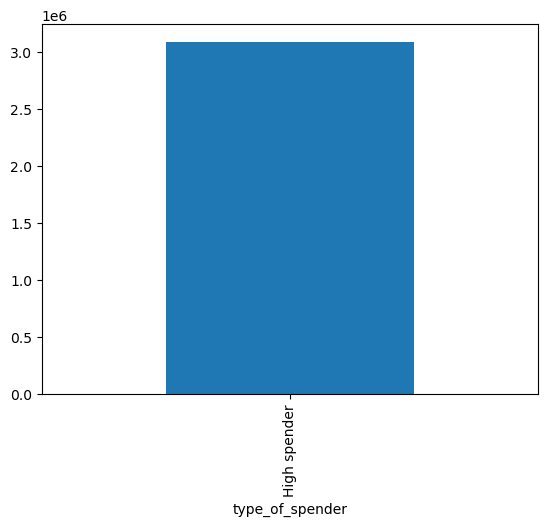

In [84]:
ly_spender_bar= Loyal_customer_df['type_of_spender'].value_counts().sort_index().plot.bar()

In [90]:
Loyal_customer_df['type_of_spender'].value_counts().sort_index()

type_of_spender
High spender    3085578
Name: count, dtype: int64

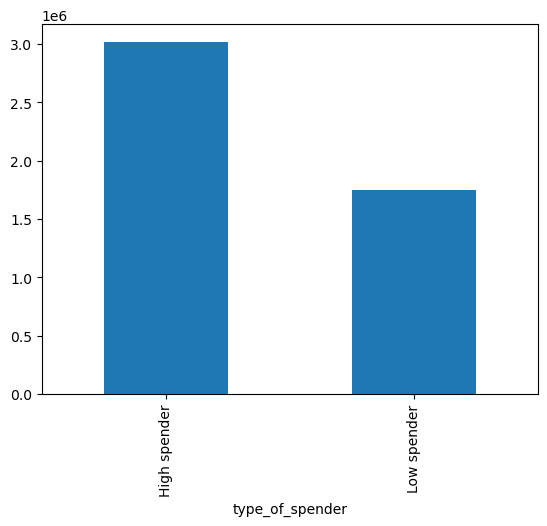

In [85]:
rg_spender_bar= regular_customer_df['type_of_spender'].value_counts().sort_index().plot.bar()

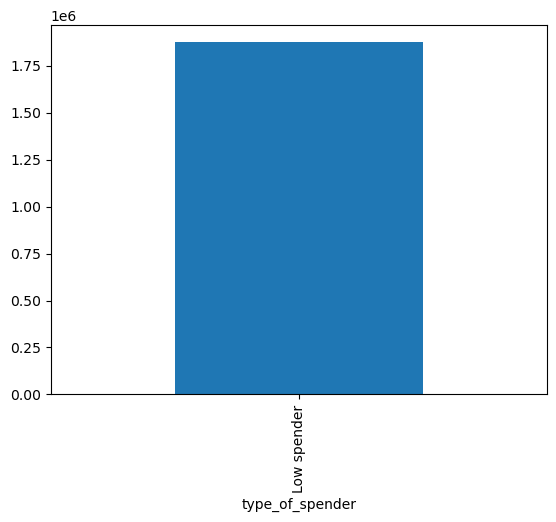

In [86]:
new_spender_bar= New_customer_df['type_of_spender'].value_counts().sort_index().plot.bar()

## exporting images

In [33]:
nc_depart_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histograph_departmentss_new.png'))

In [34]:
rg_depart_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histograph_departmentss_regular.png'))

In [35]:
ly_depart_hist.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'histograph_departmentss_loyal.png'))

In [88]:
ly_spender_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_spender_loyal.png'))

In [89]:
rg_spender_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_spender_reg.png'))

In [87]:
new_spender_bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'bar_spender_new.png'))

# Age trends

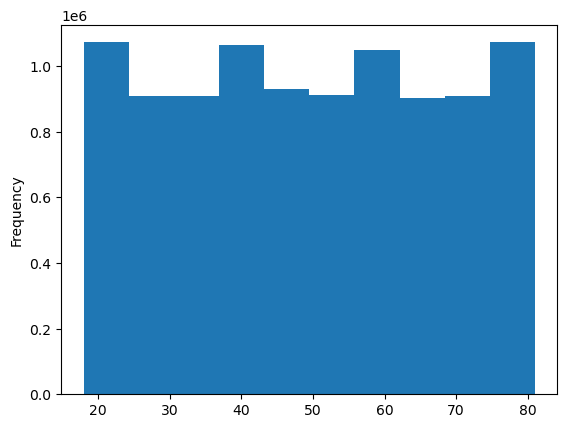

In [36]:
hist = filtered_df['Age'].plot.hist(bins = 10)

# break down into age groups

In [43]:
filtered_df.loc[filtered_df['Age'] < 30, 'age_group'] = 'under 30'
filtered_df.loc[(filtered_df['Age'] >= 60) & (df_ords_prods_merge['Age'] < 30), 'age_group'] = '30-60'
filtered_df.loc[filtered_df['Age'] >= 60, 'age_group'] = '60+'

In [44]:
filtered_df.head(10)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,type_of_spender,frequency_median,type_of_frequency,Age,n_dependants,fam_status,income,_merge,age_group_2,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
1,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
2,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
3,2398795,1,2,3,7,15.0,10258,2,0,Pistachios,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
4,2398795,1,2,3,7,15.0,13032,6,0,Cinnamon Toast Crunch,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
5,473747,1,3,3,12,21.0,12427,2,1,Original Beef Jerky,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
6,473747,1,3,3,12,21.0,10258,3,1,Pistachios,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
7,2254736,1,4,4,7,29.0,25133,4,1,Organic String Cheese,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
8,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60
9,431534,1,5,4,15,28.0,12427,2,1,Original Beef Jerky,...,Low spender,6.0,Frequent customer,31,3,married,40423,both,"[30, 60)",30-60


In [45]:
age_group_counts = filtered_df['age_group'].value_counts()

# Exploring data

In [76]:
# Grouping by loyalty_flag and product_name, then counting occurrences
under_popular_department_id_2 = .groupby(['age_group', 'department_id']).size().reset_index(name='count')

SyntaxError: invalid syntax (3938074705.py, line 2)

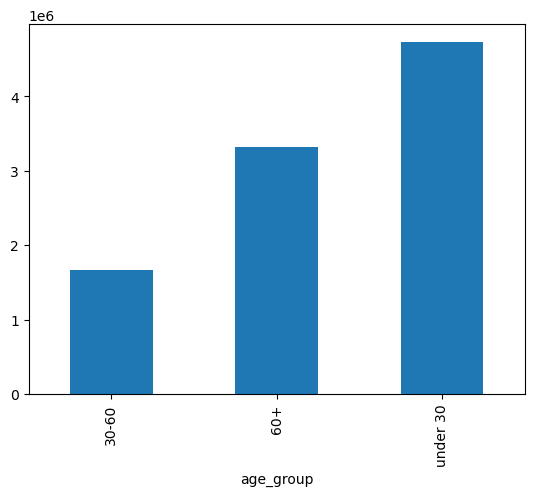

In [51]:
bar2 = filtered_df['age_group'].value_counts().sort_index().plot.bar()

# break down into age_group statues

In [66]:
customer_under_30 = filtered_df[filtered_df['age_group'] == 'under 30']

In [67]:
customer_3060 = filtered_df[filtered_df['age_group'] == '30-60']

In [68]:
customer_60plus = filtered_df[filtered_df['age_group'] == '60+']

# bar chart of age groups and days of week

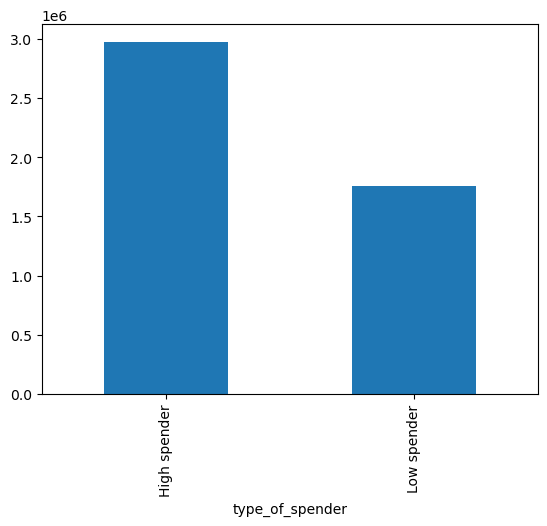

In [74]:
cu30bar = customer_under_30['type_of_spender'].value_counts().sort_index().plot.bar()

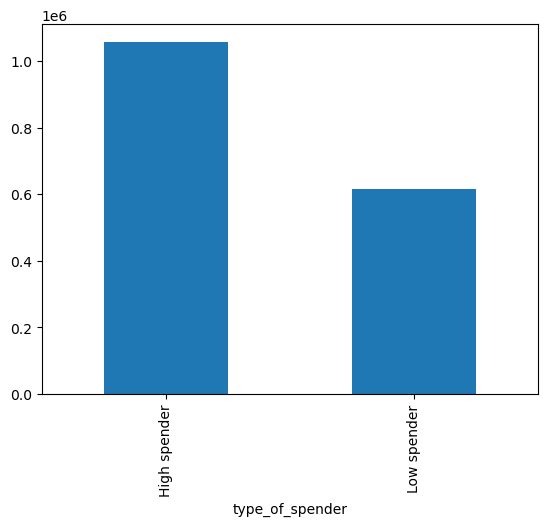

In [73]:
cu3060bar = customer_3060['type_of_spender'].value_counts().sort_index().plot.bar()

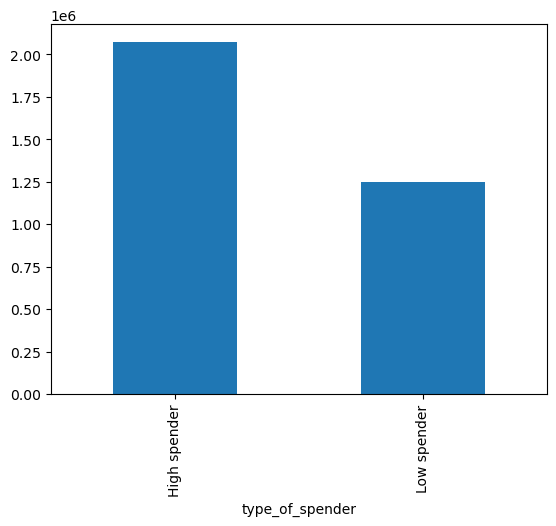

In [75]:
cu60bar = customer_60plus['type_of_spender'].value_counts().sort_index().plot.bar()

# Exporting Chart

In [78]:
cu30bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spenders_bar_under_30.png'))

In [77]:
cu3060bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spenders_bar_30-60.png'))

In [79]:
cu60bar.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'spenders_bar_over_60.png'))